In [43]:
f = open("time_optimized_100_200_300.txt")
l=[]
for line in f:
    l.append([w for w in line.replace("\t", " ").replace("\n", "").split(" ") if w != ''])
f.close()
# l[:3]

In [44]:
l

[['0__0.xml', '0'],
 ['100_0.000000_0.xml', '4.0K'],
 ['Tarjan',
  '0.000005s',
  'wall,',
  '0.000000s',
  'user',
  '+',
  '0.000000s',
  'system',
  '=',
  '0.000000s',
  'CPU',
  '(n/a%)'],
 ['Nuutila',
  '0.000003s',
  'wall,',
  '0.000000s',
  'user',
  '+',
  '0.000000s',
  'system',
  '=',
  '0.000000s',
  'CPU',
  '(n/a%)'],
 ['Pearce',
  '0.000002s',
  'wall,',
  '0.000000s',
  'user',
  '+',
  '0.000000s',
  'system',
  '=',
  '0.000000s',
  'CPU',
  '(n/a%)'],
 ['Components:', '100'],
 ['Correct:', '1'],
 ['100_0.001010_10.xml', '8.0K'],
 ['Tarjan',
  '0.000006s',
  'wall,',
  '0.000000s',
  'user',
  '+',
  '0.000000s',
  'system',
  '=',
  '0.000000s',
  'CPU',
  '(n/a%)'],
 ['Nuutila',
  '0.000003s',
  'wall,',
  '0.000000s',
  'user',
  '+',
  '0.000000s',
  'system',
  '=',
  '0.000000s',
  'CPU',
  '(n/a%)'],
 ['Pearce',
  '0.000002s',
  'wall,',
  '0.000000s',
  'user',
  '+',
  '0.000000s',
  'system',
  '=',
  '0.000000s',
  'CPU',
  '(n/a%)'],
 ['Components:', '10

In [45]:
ll = []
i=0
while i< len(l):
    if "__" in l[i][0]:
        i+=1
    else:
        try:
            v, p, e = l[i][0][:-4].split("_")
            ll.append([int(v), float(p), int(e), float(l[i+1][1][:-1]), float(l[i+2][1][:-1]), float(l[i+3][1][:-1]), int(l[i+4][1]), int(l[i+5][1])])
        except:
            print(l[i][0][:-4].split("_"))
        i+=6
ll[:3]

[[100, 0.0, 0, 5e-06, 3e-06, 2e-06, 100, 1],
 [100, 0.00101, 10, 6e-06, 3e-06, 2e-06, 100, 1],
 [100, 0.00202, 20, 7e-06, 3e-06, 2e-06, 100, 1]]

In [46]:
import csv
f = open("time_optimized_100_200_300.csv", "w")
f.write("vertices,percentage,edges,tarjan,nuutila,pearce,components,correct\n")
w = csv.writer(f)
w.writerows(ll)
f.close()

In [47]:
import pandas as pd

In [48]:
t = pd.read_csv("time_first_try.csv")
#t = t[["vertices","percentage","edges", "tarjan", "nuutila", "pearce"]].groupby(by=["vertices","percentage","edges"], as_index=False).mean()

In [49]:
t["v+e"]=t["vertices"]+t["edges"]

In [50]:
#for n in ["tarjan", "nuutila", "pearce"]:
#    t[n] = t[n]/t["v+e"]

In [51]:
t.describe()

,vertices,percentage,edges,tarjan,nuutila,pearce,components,correct,v+e
count,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.0,1093.000000
mean,245.196706,0.407909,18811.781336,8.862425,8.725277,8.738764,3.822507,1.0,19056.978042
std,65.655909,0.255726,12126.514548,6.718463,6.607192,6.621834,24.236162,0.0,12161.856198
min,100.000000,0.000000,0.000000,0.005653,0.005533,0.005335,1.000000,1.0,100.000000
25%,200.000000,0.195095,8024.000000,3.423012,3.401697,3.366320,1.000000,1.0,8244.000000
50%,300.000000,0.391304,18239.000000,7.193396,7.070789,7.128759,1.000000,1.0,18495.000000
75%,300.000000,0.586399,26988.000000,14.326378,14.121282,14.142496,1.000000,1.0,27288.000000
max,300.000000,1.000000,43456.000000,24.081377,23.765367,23.939858,300.000000,1.0,43756.000000


In [52]:
t[t["v+e"]>25200]

,vertices,percentage,edges,tarjan,nuutila,pearce,components,correct,v+e
491,200,0.982412,25013,8.743804,8.624256,8.596670,1,1,25213
492,200,0.984925,25048,8.774826,8.503987,8.612761,1,1,25248
493,200,0.987437,25088,8.727388,8.625901,8.609757,1,1,25288
494,200,0.989950,25118,8.753068,8.636541,8.622350,1,1,25318
495,200,0.992462,25152,8.794479,8.730295,8.597546,1,1,25352
496,200,0.994975,25183,8.742932,8.652326,8.718250,1,1,25383
497,200,0.997487,25212,8.761626,8.712411,8.780813,1,1,25412
498,200,1.000000,25246,8.796152,8.594011,8.476837,1,1,25446
790,300,0.324415,24911,13.424328,13.189869,13.274915,1,1,25211
791,300,0.325530,24984,13.470722,13.225380,13.192772,1,1,25284


/usr/lib64/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7facb3e71da0>,
      dtype=object)

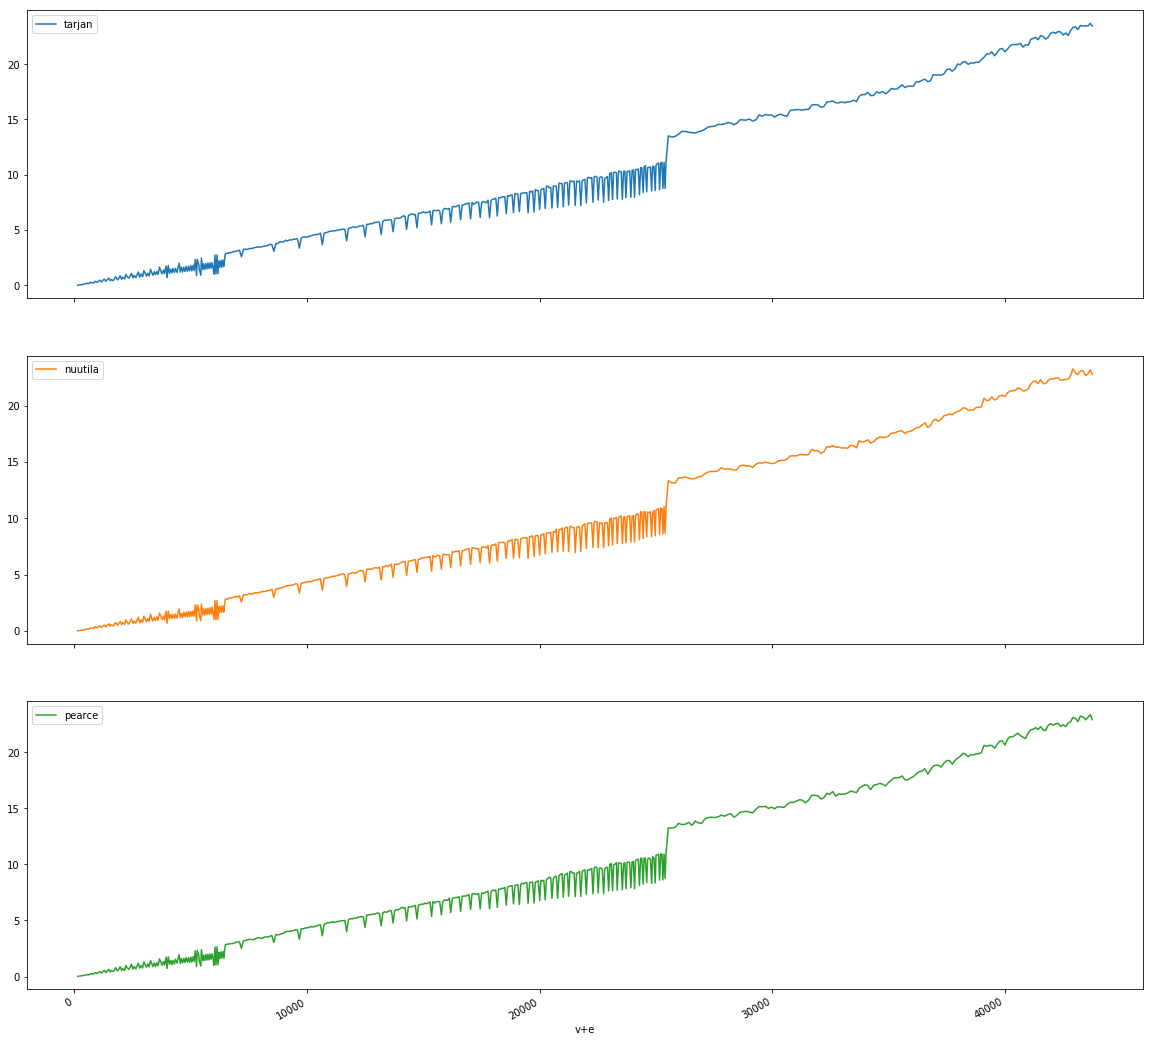

In [67]:
t = t.sort_values(by=["v+e","edges","vertices"])
t.groupby(np.arange(len(t))//2).mean().plot(x="v+e", y=["tarjan","nuutila","pearce"],figsize=(20,20), subplots=True)

/usr/lib64/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


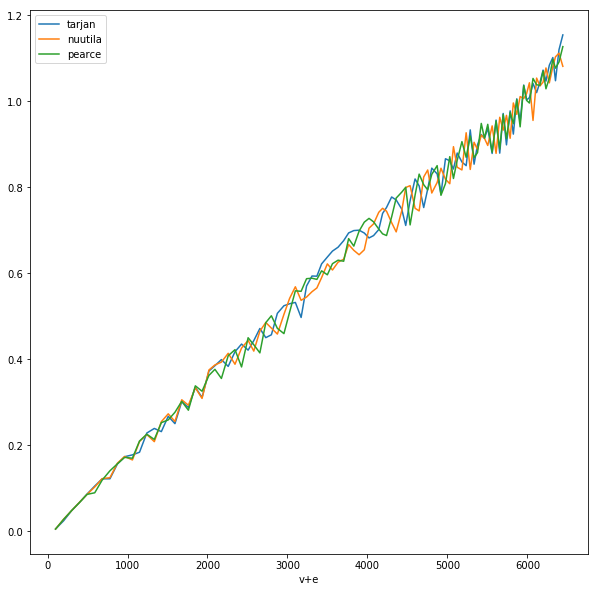

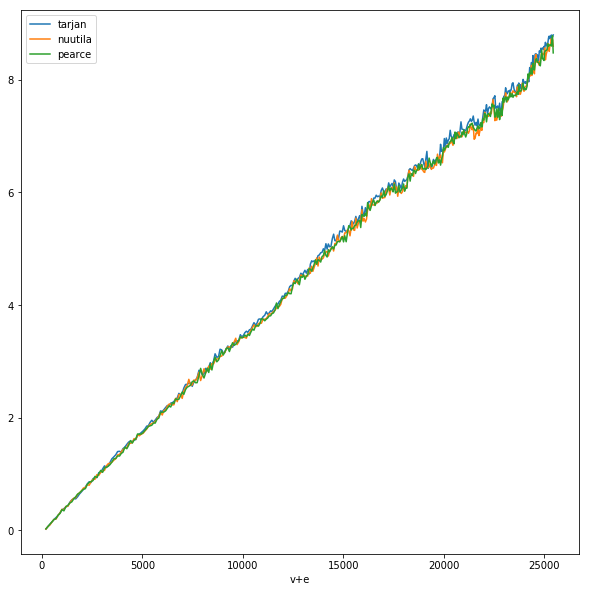

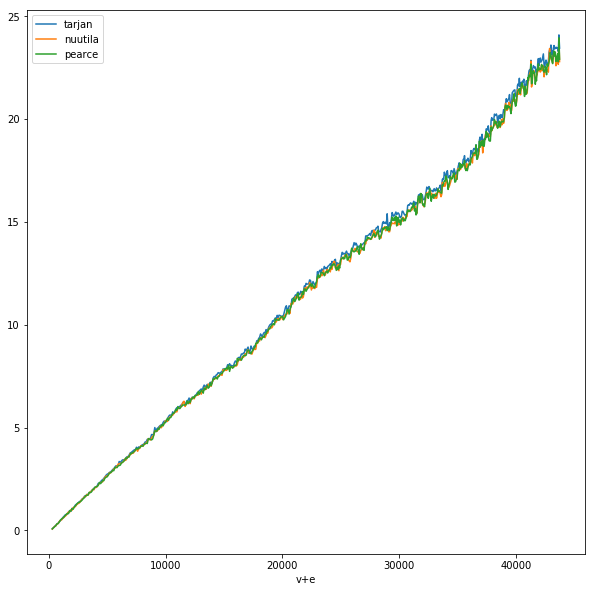

In [54]:
t[t["vertices"]==100].plot(x="v+e", y=["tarjan","nuutila","pearce"],figsize=(10,10))
t[t["vertices"]==200].plot(x="v+e", y=["tarjan","nuutila","pearce"],figsize=(10,10))
t[t["vertices"]==300].plot(x="v+e", y=["tarjan","nuutila","pearce"],figsize=(10,10))

/usr/lib64/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
/usr/lib64/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
/usr/lib64/python3.6/site-packages/matplotlib/colors.py:489: RuntimeWarning: invalid value encountered in less
  np.copyto(xa, -1, where=xa < 0.0)


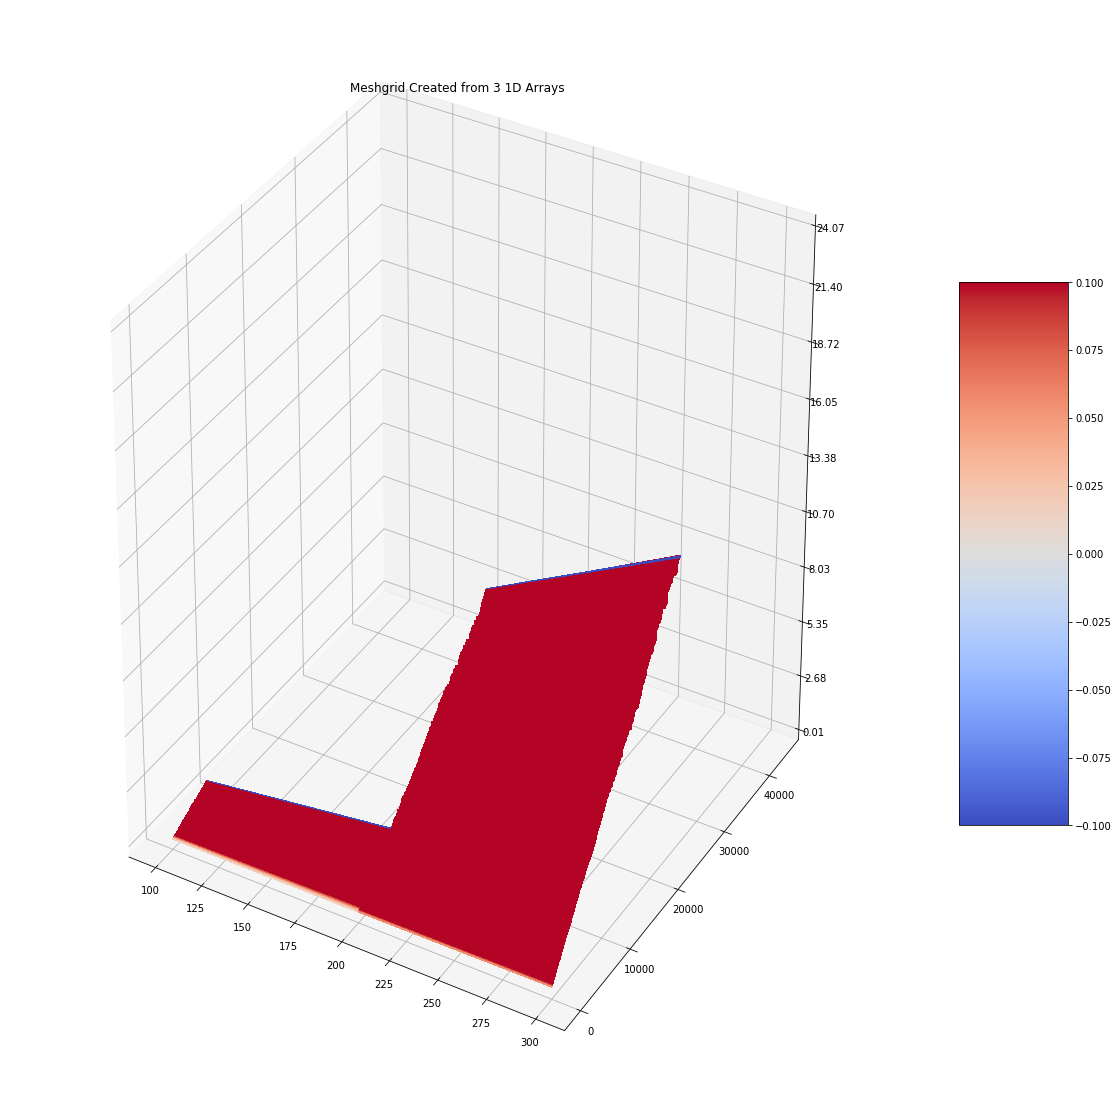

In [55]:
from scipy.interpolate import griddata
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D

df=t
x1 = np.linspace(df['vertices'].min(), df['vertices'].max(), len(df['vertices'].unique()))
y1 = np.linspace(df['edges'].min(), df['edges'].max(), len(df['edges'].unique()))

"""
x, y via meshgrid for vectorized evaluation of
2 scalar/vector fields over 2-D grids, given
one-dimensional coordinate arrays x1, x2,..., xn.
"""

x2, y2 = np.meshgrid(x1, y1)

# Interpolate unstructured D-dimensional data.
z2 = griddata((df['vertices'], df['edges']), df['tarjan'], (x2, y2), method='cubic')

# Ready to plot
fig = plt.figure(figsize=(20,20))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x2, y2, z2, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
#ax.set_zlim(-1.01, 1.01)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Meshgrid Created from 3 1D Arrays')

plt.show()

#Modified example using <code>DataFrame</code> input

In [56]:
np.sin(t["v+e"])

0      -0.506366
100    -0.873297
1      -0.061890
499    -0.999756
101    -0.999756
2      -0.999756
3       0.916534
102    -0.017732
500    -0.850919
4      -0.696102
501    -0.467772
103    -0.467772
5      -0.580562
502     0.044182
104     0.044182
6      -0.956394
503    -0.412173
105    -0.412173
7       0.773929
504     0.105928
106    -0.779504
8      -0.354854
107     0.483371
505     0.997803
9       0.451945
108    -0.114875
506    -0.026461
10     -0.756743
109     0.988018
507    -0.529006
          ...   
1063    0.532123
1064    0.904051
1065    0.384473
1066   -0.998634
1067    0.207273
1068    0.891639
1069   -0.828858
1070   -0.989878
1071   -0.917962
1072   -0.999056
1073    0.606171
1074    0.940763
1075    0.448769
1076   -0.555760
1077   -0.282916
1078    0.967053
1079    0.888327
1080    0.351498
1081   -0.611957
1082    0.777157
1083    0.407399
1084   -0.012529
1085    0.510820
1086   -0.792681
1087    0.998036
1088    0.998989
1089   -0.118467
1090   -0.7534